# Classification - BoW

This notebook discusses Multi-label classification methods for the [academia.stackexchange.com](https://academia.stackexchange.com/) data dump in BoW representation.

## Table of Contents
* [Data import](#data_import)
* [Data preparation](#data_preparation)
* [Methods](#methods)
* [Evaluation](#evaluation)

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from joblib import dump, load
from pathlib import Path
from academia_tag_recommender.definitions import MODELS_PATH
from academia_tag_recommender.classifier import Classifier, available_classifier_paths

DATA_FOLDER = Path(MODELS_PATH) / 'classifier' / 'multi-label'
RANDOM_STATE = 0

<a id='data_import'/>

## Data import

In [2]:
from academia_tag_recommender.data import documents
from academia_tag_recommender.test_train_data import get_y, get_test_train_data

from academia_tag_recommender.test_train_data import get_X_reduced, get_y, get_test_train_data
from academia_tag_recommender.preprocessing_definition import PreprocessingDefinition

preprocessing = PreprocessingDefinition('tfidf', 'basic', 'basic', 'english', '1,1', 'TruncatedSVD')
X_train, X_test, y_train, y_test = get_test_train_data(get_X_reduced(preprocessing), get_y())
print('Train set with shape ', X_train.shape)
print('Test set with shape', X_test.shape)

Train set with shape  (24812, 5993)
Test set with shape (8270, 5993)


<a id='data_preparation'/>

## Data Preparation

In [3]:
from academia_tag_recommender.preprocessing_definition import PreprocessingDefinition
paths = available_classifier_paths('tfidf')

def create_classifier(classifier, name):
    path = [path for path in paths if name in path.name]
    if len(path) > 0:
        clf = load(path[0])
    else:
        clf = Classifier(classifier, preprocessing, name)
        clf.fit(X_train, y_train)
        clf.score(X_test, y_test)
        clf.save('tfidf')
    print('Training: {}s'.format(clf.training_time))
    print('Test: {}s'.format(clf.test_time))
    clf.evaluation.print_stats()

<a id='methods'/>

## Methods

* [Problem Transformation](#problem_transformation)
* [Algorithm Adaption](#algorithm_adaption)
* [Ensembles](#ensembles)

<a id='problem_transformation'/>

### Problem Transformation

- [DecisionTreeClassifier](#decisiontree)
- [KNeighborsClassifier](#kNN)
- [MLPClassifier](#mlp)
- [MultioutputClassifier](#multioutput)
- [Classifier Chain](#chain)
- [Label Powerset](#label_powerset)

<a id='decisiontree'/>

**DecisionTreeClassifier** [source](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

In [4]:
from sklearn.tree import DecisionTreeClassifier

create_classifier(DecisionTreeClassifier(random_state=RANDOM_STATE), 'DecisionTreeClassifier')

Training: 5157.041726589203s
Test: 0.22439789772033691s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.021073633297269776     0.01124546553808948      0.22622934300685205      0.2187464731962918       0.20270148365674365      
micro                                                            0.21109369805765305      0.21221235558101786      0.21165154869890246      
macro                                                            0.09316818545880633      0.09407338455191613      0.09322556858667545      


<a id='kNN'/>

**KNeighborsClassifier** [source](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

create_classifier(KNeighborsClassifier(), 'KNeighborsClassifier')

Training: 50.60759139060974s
Test: 2169.930188894272s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.013444281804874945     0.0403869407496977       0.05108827085852479      0.02569125352680371      0.03232106869349916      
micro                                                            0.42447257383966247      0.02401413157643464      0.045456599340291906     
macro                                                            0.2829815402946036       0.02537771232785004      0.039906697841395465     


<a id='mlp'/>

**MLPClassifier** [source](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

In [8]:
from sklearn.neural_network import MLPClassifier

create_classifier(MLPClassifier(random_state=RANDOM_STATE), 'MLPClassifier')

Training: 560.7325749397278s
Test: 0.31615424156188965s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.014173614204798575     0.05211608222490931      0.3856041150841634       0.2997279322853688       0.31015237885854574      
micro                                                            0.4513404333455747       0.29337343645564784      0.3556031364833193       
macro                                                            0.44769010623993016      0.1950486469109478       0.2594623860166471       


<a id='multioutput'/>

**MultioutputClassifier** [source](https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html#sklearn.multioutput.MultiOutputClassifier)

MultiouputClassifier transforms sklearn classifier into classifiers capable of Binary Relevence.

In [9]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import LinearSVC

create_classifier(MultiOutputClassifier(LinearSVC(random_state=RANDOM_STATE)), 'MultioutputClassifier(LinearSVC)')

Training: 2004.9412786960602s
Test: 15.422645092010498s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.016360974988862725     0.03857315598548972      0.3703249457783919       0.34679766223297054      0.3275619382632684       
micro                                                            0.3750524769101595       0.34121073235940036      0.3573321333933303       
macro                                                            0.45606361506182375      0.24969588385802216      0.30470266656193         


In [10]:
from sklearn.linear_model import LogisticRegression

create_classifier(MultiOutputClassifier(LogisticRegression(random_state=RANDOM_STATE)), 'MultioutputClassifier(LogisticRegression)')

Training: 804.097718000412s
Test: 15.942527055740356s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.013152803411188189     0.0633615477629988       0.4242845626763402       0.29961104393389765      0.3246216178017871       
micro                                                            0.5116746171227717       0.29189344027499287      0.3717282261741906       
macro                                                            0.5573365597161809       0.18069715131874634      0.25364457923518974      


<a id='chain'/>

**Classifier Chain** [source](http://scikit.ml/api/skmultilearn.problem_transform.cc.html#skmultilearn.problem_transform.ClassifierChain)

<cite>[Read et al., 2011][1]</cite>

[1]: https://doi.org/10.1007/s10994-011-5256-5

In [11]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.svm import LinearSVC

create_classifier(ClassifierChain(classifier=LinearSVC(random_state=RANDOM_STATE)), 'ClassifierChain(LinearSVC)')

Training: 2613.802140712738s
Test: 81.65234613418579s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.016203143893591294     0.036517533252720676     0.3717736223872863       0.34415961305925036      0.32806801823730486      
micro                                                            0.3790590504769049       0.33772558006301917      0.3572005655423146       
macro                                                            0.46494360004378105      0.24796132318742514      0.30526001393188273      


In [12]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression
create_classifier(ClassifierChain(classifier=LogisticRegression(random_state=RANDOM_STATE)), 'ClassifierChain(LogisticRegression)')

Training: 1704.0577557086945s
Test: 99.8096375465393s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.013158531152548844     0.06590084643288996      0.42641619162779987      0.30327690447400246      0.3280978292163298       
micro                                                            0.5110675488033979       0.2987062586527904       0.3770412774932209       
macro                                                            0.5623715016423522       0.18749398022363278      0.26242890247276174      


<a id='label_powerset'/>

**Label Powerset** [source](http://scikit.ml/api/skmultilearn.problem_transform.lp.html#skmultilearn.problem_transform.LabelPowerset)

In [13]:
from skmultilearn.problem_transform import LabelPowerset

#create_classifier(LabelPowerset(classifier=LinearSVC(random_state=RANDOM_STATE)), 'LabelPowerset(LinearSVC)')

In [14]:
# Does not finish
#create_classifier(LabelPowerset(classifier=LogisticRegression(random_state=RANDOM_STATE)), 'LabelPowerset(LogisticRegression)')

<a id='Algorithm Adaption'/>

### Algorithm Adaption

- [MLkNN](#mlknn)
- [MLARAM](#mlaram)

<a id='mlknn'/>

**MLkNN** [source](http://scikit.ml/api/skmultilearn.adapt.mlknn.html#multilabel-k-nearest-neighbours)

> Firstly, for each test instance, its k nearest neighbors in the training set are identified. Then, according to statistical information gained from the label sets of these neighboring instances, i.e. the number of neighboring instances belonging to each possible class, maximum a posteriori (MAP) principle is utilized to determine the label set for the test instance.
<cite>[Zhang & Zhou, 2007][1]</cite>

[1]: https://doi.org/10.1016/j.patcog.2006.12.019

In [15]:
from skmultilearn.adapt import MLkNN

create_classifier(MLkNN(), 'MLkNN')

Training: 7409.826714515686s
Test: 2200.530954837799s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.015335709285305161     0.028174123337363965     0.13211022821059096      0.09265215638855302      0.09807966788015154      
micro                                                            0.26878906817851433      0.08840122394339262      0.13304551178269475      
macro                                                            0.2742383130328399       0.08502324739182006      0.11536507783863943      


<a id='mlaram'/>

**MLARAM** [source](http://scikit.ml/api/skmultilearn.adapt.mlaram.html#skmultilearn.adapt.MLARAM)

> an extension of fuzzy Adaptive Resonance Associative Map (ARAM) – an Adaptive Resonance Theory (ART)based neural network. It aims at speeding up the classification process in the presence of very large data.
<cite>[F. Benites & E. Sapozhnikova, 2015][7]</cite>

[7]: https://doi.org/10.1109/ICDMW.2015.14

In [18]:
from skmultilearn.adapt import MLARAM

create_classifier(MLARAM(), 'MLARAM')

Training: 63.281604290008545s
Test: 10540.413585186005s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.04877489976452619      0.0032648125755743653    0.06493662199179082      0.1769528415961306       0.07572893557711445      
micro                                                            0.05906184718617459      0.17842799770510614      0.08874726529059261      
macro                                                            0.073959154388694        0.04972446417106336      0.016834037017964553     


<a id='ensembles'/>

### Ensembles

- [RAkELo](#rakelo)
- [RAkELd](#rakeld)
- [MajorityVotingClassifier](#majority_voting)
- [LabelSpacePartitioningClassifier](#label_space)

<a id='rakelo'/>

**RAkELo** [source](http://scikit.ml/api/skmultilearn.ensemble.rakelo.html#skmultilearn.ensemble.RakelO)

> Rakel: randomly breaking the initial set of labels into a number of small-sized labelsets, and employing [Label powerset] to train a corresponding multilabel classifier.
<cite>[Tsoumakas et al., 2011][1]</cite>


> Divides the label space in to m subsets of size k, trains a Label Powerset classifier for each subset and assign a label to an instance if more than half of all classifiers (majority) from clusters that contain the label assigned the label to the instance.
<cite>[skmultilearn][2]</cite>


[1]: https://doi.org/10.1109/TKDE.2010.164
[2]: http://scikit.ml/api/skmultilearn.ensemble.rakelo.html#skmultilearn.ensemble.RakelO

In [21]:
from skmultilearn.ensemble import RakelO
from sklearn.svm import LinearSVC

create_classifier(RakelO(
    base_classifier=LinearSVC(random_state=RANDOM_STATE),
    model_count=y_train.shape[1]
), 'RakelO(LinearSVC)')

Training: 11677.108204126358s
Test: 146.43390727043152s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.015207508245571587     0.047060246794096296     0.3861661270686192       0.3136684410033067       0.3187852298788665       
micro                                                            0.4067508957194041       0.3093655877993976       0.35143648509205455      
macro                                                            0.47906313969202713      0.22769599620182526      0.2906524035508689       


In [22]:
from sklearn.linear_model import LogisticRegression

create_classifier(RakelO(
    base_classifier=LogisticRegression(random_state=RANDOM_STATE),
    model_count=y_train.shape[1]
), 'RakelO(LogisticRegression)')

Training: 3828.7409257888794s
Test: 148.61050415039062s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.01341958816712723      0.062424389063634164     0.4203242196951367       0.29725784337446565      0.3224071449694484       
micro                                                            0.49360778322746646      0.29349333078357315      0.3681117707021647       
macro                                                            0.5553839625585044       0.18613967835452983      0.25989651168623623      


<a id='rakeld'/>

**RAkELd** [source](http://scikit.ml/api/skmultilearn.ensemble.rakeld.html#skmultilearn.ensemble.RakelD)

>Divides the label space in to equal partitions of size k, trains a Label Powerset classifier per partition and predicts by summing the result of all trained classifiers.
<cite>[skmultilearn][3]</cite>

[3]: http://scikit.ml/api/skmultilearn.ensemble.rakeld.html#skmultilearn.ensemble.RakelD

In [23]:
from skmultilearn.ensemble import RakelD

create_classifier(RakelD(base_classifier=LinearSVC(random_state=RANDOM_STATE)), 'RakelD(LinearSVC)')

Training: 3558.652092218399s
Test: 58.664090156555176s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.017434130935856457     0.032059037019114445     0.35602717577070353      0.3418723284135817       0.3188085646106454       
micro                                                            0.34344119356713815      0.3389587416933595       0.34118524578330645      
macro                                                            0.38784609695138406      0.2499246424201575       0.2884624465039655       


In [24]:
create_classifier(RakelD(base_classifier=LogisticRegression(random_state=RANDOM_STATE)), 'RakelD(LogisticRegression)')

Training: 1287.9575905799866s
Test: 59.491294145584106s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.013629706979764922     0.059520929107186066     0.41799165831345847      0.30348616823937413      0.32578447710313185      
micro                                                            0.4813258993355228       0.30128603528230624      0.3705968832696266       
macro                                                            0.5466679845632149       0.19315456802931363      0.2665980844154815       


***Clustering***

In [25]:
from skmultilearn.cluster import LabelCooccurrenceGraphBuilder
from academia_tag_recommender.test_train_data import get_all_labels

def get_graph_builder():
    graph_builder = LabelCooccurrenceGraphBuilder(weighted=True, include_self_edges=False)
    label_names = get_all_labels()
    edge_map = graph_builder.transform(y_train)
    print("{} labels, {} edges".format(len(label_names), len(edge_map)))
    return graph_builder

In [26]:
from skmultilearn.cluster import IGraphLabelGraphClusterer
import igraph as ig

def get_clusterer():
    graph_builder = get_graph_builder()
    clusterer_igraph = IGraphLabelGraphClusterer(graph_builder=graph_builder, method='walktrap')
    partition = clusterer_igraph.fit_predict(X_train, y_train)
    return clusterer_igraph

In [27]:
clusterer_igraph = get_clusterer()

190 labels, 7722 edges


<a id='majority_vorting'/>

**MajorityVotingClassifier** [source](http://scikit.ml/api/skmultilearn.ensemble.voting.html#skmultilearn.ensemble.MajorityVotingClassifier)

In [28]:
from skmultilearn.ensemble.voting import MajorityVotingClassifier
from skmultilearn.problem_transform import ClassifierChain

create_classifier(MajorityVotingClassifier(
    classifier=ClassifierChain(classifier=LogisticRegression(random_state=RANDOM_STATE)),
    clusterer=clusterer_igraph
), 'MajorityVotingClassifier(ClassifierChain(LogisticRegression))')

Training: 1431.5162394046783s
Test: 93.05138778686523s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.013129256030038821     0.06650544135429262      0.4213183048310013       0.30288794840789995      0.32499107502735075      
micro                                                            0.5114592882740229       0.2935661325041856       0.3730245562849501       
macro                                                            0.5466010123070143       0.18206753581388366      0.2553868275207446       


In [29]:
create_classifier(MajorityVotingClassifier(
    classifier=ClassifierChain(classifier=LinearSVC(random_state=RANDOM_STATE)),
    clusterer=clusterer_igraph
), 'MajorityVotingClassifier(ClassifierChain(LinearSVC))')

Training: 2547.6452865600586s
Test: 93.82441854476929s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.016303061159549416     0.035671100362756954     0.37213206080497496      0.3511608222490932       0.3303801176654865       
micro                                                            0.3766104535456164       0.343984692657259        0.3595589889747243       
macro                                                            0.44622617735806613      0.25234185708489215      0.3073565522377556       


<a id='label_space'/>

**LabelSpacePartitioningClassifier** [source](http://scikit.ml/api/skmultilearn.ensemble.partition.html#skmultilearn.ensemble.LabelSpacePartitioningClassifier)

<cite>[Szymański et al., 2016][2]</cite>

[2]: https://doi.org/10.3390/e18080282

In [30]:
from skmultilearn.ensemble import LabelSpacePartitioningClassifier

create_classifier(LabelSpacePartitioningClassifier(
    classifier = ClassifierChain(classifier=LogisticRegression(random_state=RANDOM_STATE)),
    clusterer = clusterer_igraph
), 'LabelSpacePartitioningClassifier(ClassifierChain(LogisticRegression))')

Training: 1424.3991949558258s
Test: 90.49828267097473s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.013129256030038821     0.06650544135429262      0.4213183048310013       0.30288794840789995      0.32499107502735075      
micro                                                            0.5114592882740229       0.2935661325041856       0.3730245562849501       
macro                                                            0.5466010123070143       0.18206753581388366      0.2553868275207446       


In [31]:
# DNF
#create_classifier(LabelSpacePartitioningClassifier(
#    classifier = ClassifierChain(classifier=LinearSVC(random_state=RANDOM_STATE)),
#    clusterer = clusterer_igraph
#), 'LabelSpacePartitioningClassifier(ClassifierChain(LinearSVC))')

<a id='evaluation'/>

## Evaluation

In [32]:
paths = available_classifier_paths('tfidf')

In [33]:
evals = []
for path in paths:
    if '-' not in path.name:
        clf = load(path)
        evaluation = clf.evaluation
        evals.append([str(clf), evaluation])

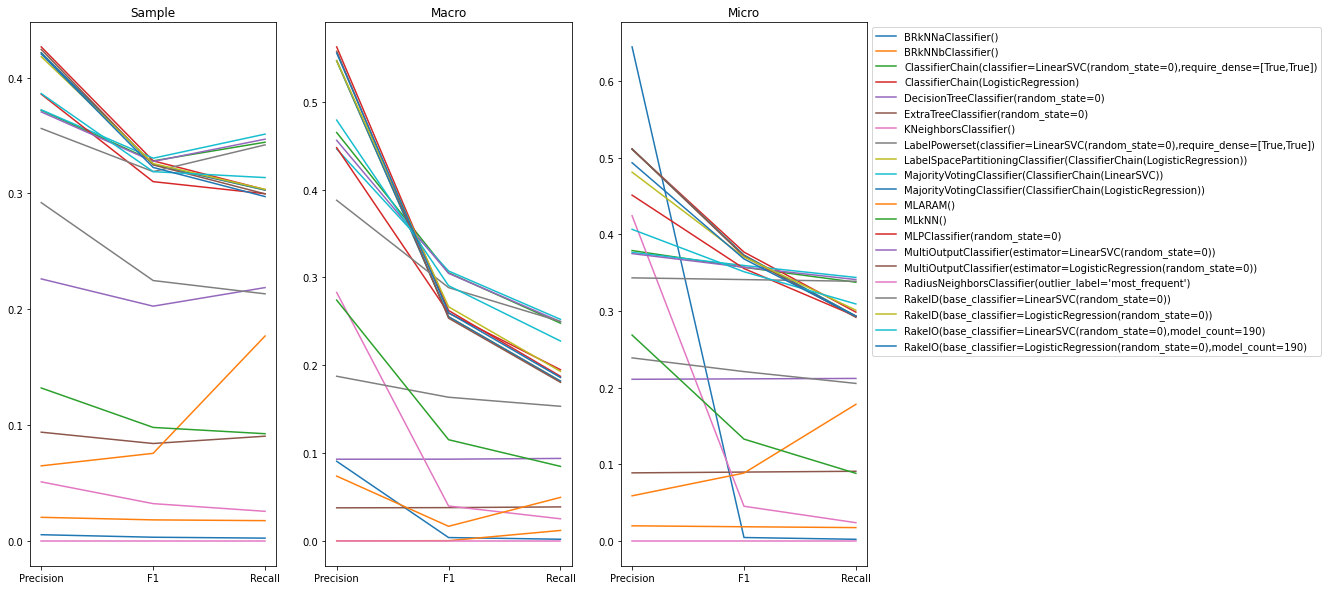

In [34]:
x_ = ['Precision', 'F1', 'Recall']
fig, axes = plt.subplots(1, 3, figsize=(15,10))
axes[0].set_title('Sample')
axes[1].set_title('Macro')
axes[2].set_title('Micro')
for eval_ in evals:
    evaluator = eval_[1]
    axes[0].plot(x_, [evaluator.precision_samples, evaluator.f1_samples, evaluator.recall_samples], label=eval_[0])
    axes[1].plot(x_, [evaluator.precision_macro, evaluator.f1_macro, evaluator.recall_macro], label=eval_[0])
    axes[2].plot(x_, [evaluator.precision_micro, evaluator.f1_micro, evaluator.recall_micro], label=eval_[0])
axes[2].legend(bbox_to_anchor=(1, 1), ncol=1)
plt.show()

In [35]:
top_3 = sorted(paths, key=lambda x: load(x).evaluation.recall_macro, reverse=True)[:3]

In [36]:
def per_label_accuracy(orig, prediction):
    if not isinstance(prediction, np.ndarray):
        prediction = prediction.toarray()
    l = 1 - orig - prediction
    return np.average(l, axis=0)

In [37]:
from sklearn.metrics import classification_report
classwise_results = []
for clf_path in top_3:
    clf = load(clf_path)
    prediction = clf.predict(X_test)
    label_accuracies = per_label_accuracy(y_test, prediction)
    report = classification_report(y_test, prediction, output_dict=True, zero_division=0)
    classwise_report = {}
    for i, result in enumerate(report):
        if i < len(label_accuracies):
            classwise_report[result] = report[result]
            classwise_report[result]['accuracy'] = label_accuracies[int(result)]
    classwise_results.append((clf, classwise_report))

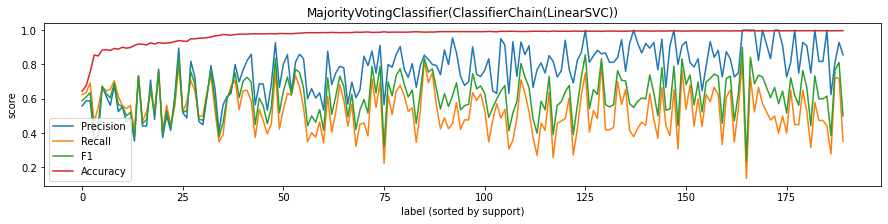

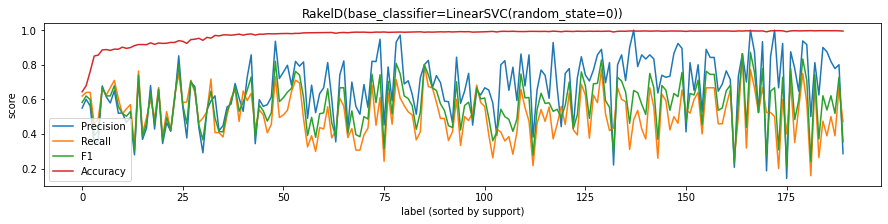

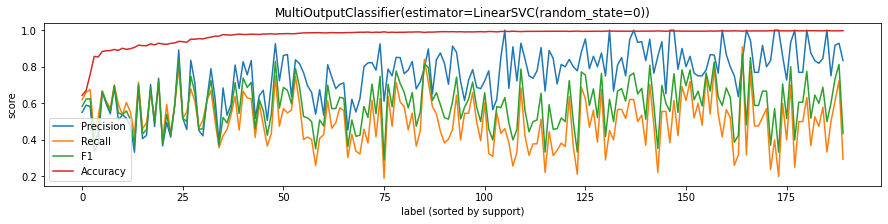

In [38]:
import numpy as np
x_ = np.arange(0, len(y_test[0]))
for classwise_result in classwise_results:
    name, results = classwise_result
    _, fig_1 = plt.subplots(figsize=(15,3))
    fig_1.set_title(name)
    sorted_results = sorted(results, key=lambda x: results[x]['support'], reverse=True)
    fig_1.plot(x_, [results[result]['precision'] for result in sorted_results][0:len(x_)], label='Precision')
    fig_1.plot(x_, [results[result]['recall'] for result in sorted_results][0:len(x_)], label='Recall')
    fig_1.plot(x_, [results[result]['f1-score'] for result in sorted_results][0:len(x_)], label='F1')
    fig_1.plot(x_, [results[result]['accuracy'] for result in sorted_results][0:len(x_)], label="Accuracy")
    fig_1.set_xlabel('label (sorted by support)')
    fig_1.set_ylabel('score')
    fig_1.legend(loc='best')
plt.show()